
## Overfitting/Overtraining

* In the polynomial curve fitting example, $M$ is the *model order*. 
* As $M$ increases, there are more parameters (more $w$) to learn and, so, the model becomes more complex.  
* As a model is more and more complex, it is more likely to *overfit* or *overtrain*.  This essentially means it may "memorize" the input training data (including all of the training data's noise).  
* Overfitting means that the performance of the model will likely decrease on unknown test data.  Overfitting means that the "true" underlying model of the data is not estimated/learned but instead results in a poor representation that memorizes meaningless noise in the data.
* There are two common approaches to avoid overfitting:
     1. More data: As you have more and more data, it becomes more and more difficult to "memorize" the data and its noise. Often, more data translates to the ability to use a more complex model and avoid overfitting.  However, generally, you need exponentially more data with increases to model complexity.  So, there is a limit to how much this helps.  If you have a very complex model, you need a huge training data set. 
     2. Regularization: Regularization methods add a penalty term to the error function to discourage overfitting.  These penalty terms encourage small values limiting the ability to overfit.  (This is just a teaser. We will discuss this further in the future.)


* You can also *underfit* your data.  When you underfit, your model complexity is not complex enough to model all of the complexities in your data. 





## Beer Foam Example

* Lets go through the Polynomial Curve fitting again with another example
* Obtained from: http://users.stat.ufl.edu/~winner/data/beer_foam.dat

Source: A. Leike (2002). "Demonstration of the Exponential Decay Law Using Beer Froth," European Journal of Physics, Vol. 23, #1, pp. 21-26

Description: Measurements of wet foam height and beer height at various time points for 3 brands of beer. Author fits exponential decay model: $H(t) = H(0)e^{-\lambda t}$

Variables/Columns:
<li> Time from pour (seconds)  4-8
<li> Erdinger Weissbier foam height (cm)  10-16
<li> Augustinerbrau Munchen foam height (cm)    18-24
<li> Budweiser foam height (cm)    26-32


In [1]:
# %load ../HelperCode/plotData.py
import matplotlib.pyplot as plt
def plotData(x1,t1,x2,t2,x3=None,t3=None,legend=[]):

    #plot everything
    p1 = plt.plot(x1, t1, 'bo') #plot training data
    p2 = plt.plot(x2, t2, 'g') #plot true value
    if(x3 is not None):
        p3 = plt.plot(x3, t3, 'r') 

    #add title, legend and axes labels
    plt.ylabel('t') #label x and y axes
    plt.xlabel('x')
    
    if(x3 is None):
        plt.legend((p1[0],p2[0]),legend)
    else:
        plt.legend((p1[0],p2[0],p3[0]),legend)


In [3]:
import numpy as np
def fitdata(x,t,M):
	'''fitdata(x,t,M): Fit a polynomial of order M to the data (x,t)'''	
	#This needs to be filled in
	X = np.array([x**m for m in range(M+1)]).T
	w = np.linalg.inv(X.T@X)@X.T@t
	return w

[ 1.39973990e+01 -1.82312421e-01  3.12156666e-03 -4.21840887e-05
  3.02586205e-07 -5.71862804e-10 -5.81161038e-12  4.05138442e-14
 -9.89564906e-17  8.67513101e-20]


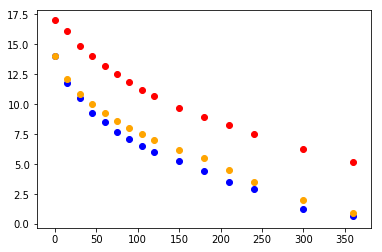

In [16]:


#Load Data
beerData = np.loadtxt('beer_foam.dat.txt')

plt.scatter(beerData[:,0], beerData[:,1], color = "red")
plt.scatter(beerData[:,0], beerData[:,2], color = "blue")
plt.scatter(beerData[:,0], beerData[:,3], color = "orange")

#Then we can fit the data using the polynomial curve fitting method we derived
x = beerData[:,0]
t = beerData[:,2]
w = fitdata(x,t,M=9)
print(w)

[1.00000000e+00 4.50000000e+02 2.02500000e+05 9.11250000e+07
 4.10062500e+10 1.84528125e+13 8.30376562e+15 3.73669453e+18
 1.68151254e+21 7.56680643e+23]
951.5641557009658


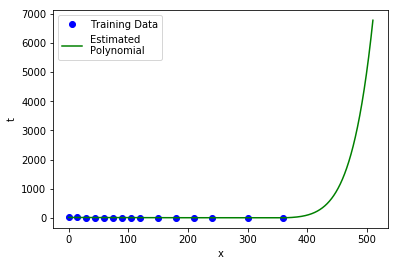

In [17]:
#Now let us use the weights in test
xrange = np.arange(beerData[0,0],beerData[beerData.shape[0]-1,0]+150,0.001)  #get equally spaced points in the xrange
X = np.array([xrange**m for m in range(w.size)]).T
esty = X@w #compute the predicted value

plotData(x,t,xrange,esty,legend=['Training Data','Estimated\nPolynomial'])

#What will the foam height be at t = ____? 
# Initialize 't' as float so below type is correct
t_predict = np.float64(450)
x_test = np.array([t_predict**m for m in range(w[:,None].size)]).T
print(x_test)
predicted_height = x_test@w
print(predicted_height)